In [111]:
import numpy as np
label = ['setosa', 'versicolor', 'virginica']
x_train = np.array([[5.1,3.5,1.4,0.2]])
y_train = np.array([[1,0,0]])
x_train.shape, y_train.shape

((1, 4), (1, 3))

In [112]:
def softmax(x):
    c = np.max(x)
    np_exp = np.exp(x - c)
    return np_exp / np.sum(np_exp)

In [113]:
W = np.random.rand(4,3)
b = np.random.rand(1,3)
W.shape, b.shape

((4, 3), (1, 3))

In [130]:
import numpy as np

label = ['setosa', 'versicolor', 'virginica']
x_train = np.array([[5.1,3.5,1.4,0.2],[5.1,3.5,23,0.2]])
y_train = np.array([[1,0,0],[1,0,0]])

W = np.random.rand(4,3)
b = np.random.rand(1,3)

epoch = 10000 # 학습 횟수
lr = 0.01    # learning rate 설정
delta = 1e-7 # 오버플로우 방지

for i in range(epoch):
    y_pred = x_train @ W + b
    print(x_train.shape, W.shape)
    loss = -np.sum(y_train*np.log(softmax(y_pred)+delta))

    Y = softmax(y_pred)-y_train
    dW = x_train.T @ Y
    db = Y
    W = W - lr*dW
    b = b - lr*db

    print(loss)

(2, 4) (4, 3)
3.251005023791921
(2, 4) (4, 3)
3.7373557138375566
(2, 4) (4, 3)
4.142093384833908
(2, 4) (4, 3)
4.506480328496942
(2, 4) (4, 3)
4.847539019389088
(2, 4) (4, 3)
5.173907085637297
(2, 4) (4, 3)
5.4905165395850135
(2, 4) (4, 3)
5.800410126885956
(2, 4) (4, 3)
6.105568702136282
(2, 4) (4, 3)
6.407331955548273
(2, 4) (4, 3)
6.706630887342066
(2, 4) (4, 3)
7.004124994611597
(2, 4) (4, 3)
7.300287613699531
(2, 4) (4, 3)
7.5954612785283215
(2, 4) (4, 3)
7.889894799508157
(2, 4) (4, 3)
8.18376867602535
(2, 4) (4, 3)
8.477212756621844
(2, 4) (4, 3)
8.770318554437187
(2, 4) (4, 3)
9.063147740987764
(2, 4) (4, 3)
9.355737794481032
(2, 4) (4, 3)
9.648105421214368
(2, 4) (4, 3)
9.940248119175772
(2, 4) (4, 3)
10.232144065322283
(2, 4) (4, 3)
10.523750354157603
(2, 4) (4, 3)
10.814999477535745
(2, 4) (4, 3)
11.105793803068758
(2, 4) (4, 3)
11.395997675607772
(2, 4) (4, 3)
11.685426634052202
(2, 4) (4, 3)
11.973833115281476
(2, 4) (4, 3)
12.260887935909388
(2, 4) (4, 3)
12.5461568555734

In [331]:
from keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [332]:
import numpy as np

def one_hot_encoding(x):
    tmp = np.zeros((len(x), 1, max(x)+1))
    for idx, data in enumerate(x):
        tmp[idx,0,data] = 1
    return tmp
    
x_train = x_train.reshape((len(x_train), 1, -1))
y_train = one_hot_encoding(y_train)
x_test = x_test.reshape((len(x_test), 1, -1))
y_test = one_hot_encoding(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 1, 784), (60000, 1, 10), (10000, 1, 784), (10000, 1, 10))

In [333]:
data = [[x,y] for x, y in zip(x_train, y_train)]

In [334]:
import random
random.shuffle(data)

In [335]:
x_train = np.array([n[0] for n in data]) 
y_train = np.array([n[1] for n in data])

In [336]:
x_train = x_train[:1000]
y_train = y_train[:1000]
x_train.shape, y_train.shape

((1000, 1, 784), (1000, 1, 10))

In [337]:
data = data[:1000]

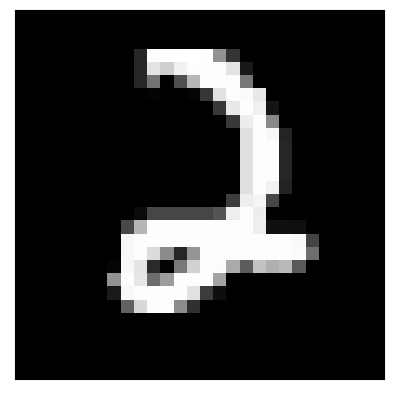

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [338]:
import cv2
from matplotlib import pyplot as plt

idx = 0

plt.imshow(x_train[idx].reshape(28,28), cmap='gray')
plt.xticks([]) # x축 눈금
plt.yticks([]) # y축 눈금
plt.show()
print(y_train[idx])

# Full 배치 경사하강법

In [342]:
def softmax(x):
    c = np.max(x)
    np_exp = np.exp(x - c)
    return np_exp / np.sum(np_exp)

W = np.random.rand(784,10)
b = np.random.rand(1,10)

epoch = 10000 # 학습 횟수
lr = 0.001    # learning rate 설정
delta = 1e-7 # 오버플로우 방지

for i in range(epoch):
    y_pred = x_train @ W + b
    loss = -np.sum(y_train*np.log(softmax(y_pred)+delta))

    Y = softmax(y_pred)-y_train
    for k in range(len(x_train)):                                                                   
        dW = x_train[k].T @ Y[k]
        db = Y[k]
        W = W - lr*dW
        b = b - lr*db

    print(f'Epoch: {i:5}/{epoch}, loss: {loss/len(x_train)}')

Epoch:     0/10000, loss: 16.11809565095832
Epoch:     1/10000, loss: 16.101977555207363
Epoch:     2/10000, loss: 16.101977555207363
Epoch:     3/10000, loss: 16.101977555207363
Epoch:     4/10000, loss: 16.101977555207363
Epoch:     5/10000, loss: 16.101977555207363
Epoch:     6/10000, loss: 16.101977555207363
Epoch:     7/10000, loss: 16.101977555207363
Epoch:     8/10000, loss: 16.101977555207363
Epoch:     9/10000, loss: 16.101977555207363
Epoch:    10/10000, loss: 16.101977555207363
Epoch:    11/10000, loss: 16.101977555207363
Epoch:    12/10000, loss: 16.101977555207363
Epoch:    13/10000, loss: 16.101977555207363
Epoch:    14/10000, loss: 16.101977555207363
Epoch:    15/10000, loss: 16.101977555207363
Epoch:    16/10000, loss: 16.101977555207363
Epoch:    17/10000, loss: 16.101977555207363
Epoch:    18/10000, loss: 16.101977555207363
Epoch:    19/10000, loss: 16.101977555207363
Epoch:    20/10000, loss: 16.101977555207363
Epoch:    21/10000, loss: 16.101977555207363
Epoch:    2

KeyboardInterrupt: 

# 확률적 경사 하강법

In [355]:
def softmax(x):
    c = np.max(x)
    np_exp = np.exp(x - c)
    return np_exp / np.sum(np_exp)

W = np.random.rand(784,10)
b = np.random.rand(1,10)

epoch = 10000 # 학습 횟수
lr = 0.000001    # learning rate 설정
delta = 1e-7 # 오버플로우 방지

hist = []

loss = -1

for i in range(epoch):
    hist_sum = []
    for x_train, y_train in data:
        y_pred = x_train @ W + b
        loss = -np.sum(y_train*np.log(softmax(y_pred)+delta))+delta

        Y = softmax(y_pred)-y_train
        dW = x_train.T @ Y
        db = Y
        W = W - lr*dW
        b = b - lr*db

        hist_sum.append(loss)
        hist.append(loss)
    print(f'Epoch: {i:5}/{epoch}, loss: {np.sum(hist_sum)/len(data)}, total_loss: {np.sum(hist_sum)}')

Epoch:     0/10000, loss: 14.508594451322718, total_loss: 14508.594451322719
Epoch:     1/10000, loss: 14.039207526908744, total_loss: 14039.207526908744
Epoch:     2/10000, loss: 13.454389779302103, total_loss: 13454.389779302102
Epoch:     3/10000, loss: 13.04822433190699, total_loss: 13048.22433190699
Epoch:     4/10000, loss: 12.733931364418206, total_loss: 12733.931364418206
Epoch:     5/10000, loss: 12.085020337235557, total_loss: 12085.020337235557
Epoch:     6/10000, loss: 11.48779979127402, total_loss: 11487.79979127402
Epoch:     7/10000, loss: 11.019633494973382, total_loss: 11019.633494973383
Epoch:     8/10000, loss: 10.51513270138885, total_loss: 10515.132701388851
Epoch:     9/10000, loss: 10.081854506527051, total_loss: 10081.854506527052
Epoch:    10/10000, loss: 9.742617838829949, total_loss: 9742.617838829949
Epoch:    11/10000, loss: 9.404474501797159, total_loss: 9404.474501797158
Epoch:    12/10000, loss: 9.102564666767774, total_loss: 9102.564666767774
Epoch:    

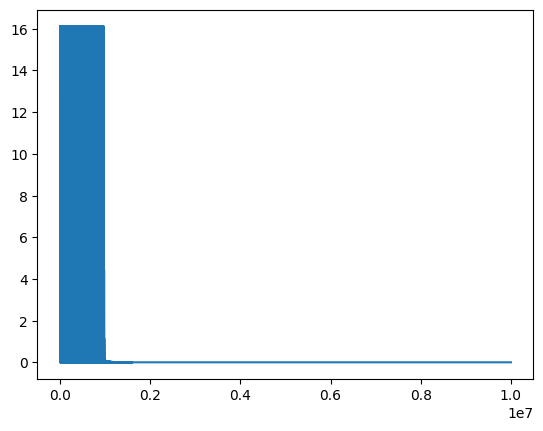

In [358]:
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

# 미니 배치 확률 경사하강법

In [354]:
def softmax(x):
    c = np.max(x)
    np_exp = np.exp(x - c)
    return np_exp / np.sum(np_exp)

W = np.random.rand(784,10)
b = np.random.rand(1,10)

epoch = 10000 # 학습 횟수
lr = 0.000001    # learning rate 설정
delta = 1e-7 # 오버플로우 방지

hist = []
loss = -1
batch_size = 10

for i in range(epoch):
    hist_sum = []
    for k in range(int(len(data)/batch_size)):
        start = k*batch_size
        end = k*batch_size+batch_size

        x_train = np.array([n[0] for n in data[start:end]]) 
        y_train = np.array([n[1] for n in data[start:end]])
        
        y_pred = x_train @ W + b
        loss = -np.sum(y_train*np.log(softmax(y_pred)+delta))+delta

        Y = softmax(y_pred)-y_train
        for k in range(len(x_train)):                                                                   
            dW = x_train[k].T @ Y[k]
            db = Y[k]
            W = W - lr*dW
            b = b - lr*db

        hist_sum.append(loss)
        hist.append(loss)
    print(f'Epoch: {i:5}/{epoch}, loss: {np.sum(hist_sum)/len(data)}, total_loss: {np.sum(hist_sum)}')

Epoch:     0/10000, loss: 16.0285497919523, total_loss: 16028.5497919523
Epoch:     1/10000, loss: 15.988606958559377, total_loss: 15988.606958559376
Epoch:     2/10000, loss: 15.779713210286511, total_loss: 15779.71321028651
Epoch:     3/10000, loss: 15.711872967597998, total_loss: 15711.872967597998
Epoch:     4/10000, loss: 15.65797423740364, total_loss: 15657.97423740364
Epoch:     5/10000, loss: 15.531806963537036, total_loss: 15531.806963537036
Epoch:     6/10000, loss: 15.492384546416279, total_loss: 15492.384546416279
Epoch:     7/10000, loss: 15.41737481938725, total_loss: 15417.37481938725
Epoch:     8/10000, loss: 15.29561754947642, total_loss: 15295.61754947642
Epoch:     9/10000, loss: 15.246099706081823, total_loss: 15246.099706081823
Epoch:    10/10000, loss: 15.155611125883064, total_loss: 15155.611125883064
Epoch:    11/10000, loss: 15.134505263743831, total_loss: 15134.505263743831
Epoch:    12/10000, loss: 15.086537532898841, total_loss: 15086.537532898841
Epoch:    

KeyboardInterrupt: 

In [357]:
np.save('./W.npy', W) # W 가중치 저장
np.save('./b.npy', b) # b 가중치 저장